
# ====== NOTEBOOK COMPLETO: Pipeline ED-Copilot ======
Este notebook executa o pipeline completo:
1. Carregamento de dados
2. Preprocessamento
3. Feature Engineering
4. Labeling
5. Análise e Visualizações


In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.data import MIMICLoader, EDPreprocessor, FeatureEngineer, OutcomeLabeler

# Configurações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

%load_ext autoreload
%autoreload 2

print("="*70)
print("🚀 ED-COPILOT - PIPELINE COMPLETO")
print("="*70)

🚀 ED-COPILOT - PIPELINE COMPLETO


In [3]:
# ============================================================
# PARTE 1: CARREGAMENTO DE DADOS
# ============================================================

print("\n" + "="*70)
print("📂 PARTE 1: CARREGAMENTO DE DADOS")
print("="*70)

# Opção A: Carregar tudo do zero (primeira execução)
LOAD_FROM_SCRATCH = True

if LOAD_FROM_SCRATCH:
    print("\n🔄 Carregando dados do MIMIC-IV...")
    
    loader = MIMICLoader(data_root='../data/raw')
    
    # Carregar sem labs para teste inicial rápido
    data = loader.load_all(
        load_labs=True,
        load_vitals=True,
        lab_strategy='filtered',
        sample_size=None
    )
    
    print("\n✅ Dados carregados!")
    loader.get_data_summary()

else:
    # Opção B: Carregar de arquivo preprocessado (execuções subsequentes)
    print("\n📂 Carregando dados preprocessados...")
    try:
        df = pd.read_parquet('../data/processed/labeled_data.parquet')
        print(f"✅ Dados carregados: {len(df):,} registros")
        
        # Pular para análises (ir para Parte 5)
    except FileNotFoundError:
        print("⚠️  Arquivo não encontrado. Execute com LOAD_FROM_SCRATCH = True")
        raise

INFO:src.data.mimic_loader:============================================================
INFO:src.data.mimic_loader:🚀 MIMIC-IV Loader Otimizado v2.0
INFO:src.data.mimic_loader:============================================================



📂 PARTE 1: CARREGAMENTO DE DADOS

🔄 Carregando dados do MIMIC-IV...


INFO:src.data.mimic_loader:✓ Pacientes: 299,712
INFO:src.data.mimic_loader:✓ ED stays: 425,087
INFO:src.data.mimic_loader:✓ Triage: 425,087
INFO:src.data.mimic_loader:✓ Vitalsign: 1,564,610
INFO:src.data.mimic_loader:✓ Diagnosis: 899,050
INFO:src.data.mimic_loader:✓ Medrecon: 2,987,342
INFO:src.data.mimic_loader:✓ Admissions: 332,101
INFO:src.data.mimic_loader:✓ Diagnoses ICD: 3,797,277
INFO:src.data.mimic_loader:✓ Lab items dict: 1,622
INFO:src.data.mimic_loader:
INFO:src.data.mimic_loader:🧪 CARREGANDO LABEVENTS - Estratégia: FILTERED
INFO:src.data.mimic_loader:============================================================
INFO:src.data.mimic_loader:🎯 Modo FILTERED: 56 itemids relevantes
INFO:src.data.mimic_loader:   Chunk  10: 4,956,997 labs | Taxa: 241,912 rows/s
INFO:src.data.mimic_loader:   Chunk  20: 9,902,190 labs | Taxa: 236,909 rows/s
INFO:src.data.mimic_loader:   Chunk  30: 14,920,451 labs | Taxa: 237,445 rows/s
INFO:src.data.mimic_loader:   Chunk  40: 19,881,244 labs | Taxa: 2


✅ Dados carregados!


INFO:src.data.preprocessing:✓ Datasets carregados: ['patients', 'edstays', 'triage', 'vitalsign', 'diagnosis', 'medrecon', 'admissions', 'diagnoses_icd', 'd_labitems', 'labevents', 'icustays']
INFO:src.data.preprocessing:
INFO:src.data.preprocessing:INICIANDO PREPROCESSAMENTO
INFO:src.data.preprocessing:============================================================
INFO:src.data.preprocessing:   ED stays inicial: (425087, 9)
INFO:src.data.preprocessing:   Colunas ED stays: ['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender', 'race', 'arrival_transport', 'disposition']
INFO:src.data.preprocessing:
   Patients shape: (299712, 5)
INFO:src.data.preprocessing:   Patients colunas: ['subject_id', 'gender', 'anchor_age', 'anchor_year', 'dod']
INFO:src.data.preprocessing:   Gender em patients: {'F': 158553, 'M': 141159}
INFO:src.data.preprocessing:   Colunas disponíveis em patients: ['subject_id', 'gender', 'anchor_age', 'anchor_year', 'dod']
INFO:src.data.preprocessing:
   Antes d


🔧 PARTE 2: PREPROCESSAMENTO


INFO:src.data.preprocessing:   ✓ Merge com admissions: 9 colunas
INFO:src.data.preprocessing:   ✓ Merge com triage: 11 colunas
INFO:src.data.preprocessing:   → Shape final após merges: (425087, 31)
INFO:src.data.preprocessing:
1️⃣  Dados iniciais: 425087 ED stays
INFO:src.data.preprocessing:   → Removidos 222071 stays não admitidos
INFO:src.data.preprocessing:2️⃣  Após filtrar admitidos: 203016 stays
INFO:src.data.preprocessing:   → Removidos 0 pacientes < 18 anos
INFO:src.data.preprocessing:3️⃣  Após filtrar adultos: 203016 stays
INFO:src.data.preprocessing:   → Removidos 13858 stays com triagem incompleta
INFO:src.data.preprocessing:   → Campos de triagem disponíveis: temperature, heartrate, resprate, o2sat, sbp, dbp, acuity
INFO:src.data.preprocessing:4️⃣  Após filtrar triagem completa: 189158 stays
INFO:src.data.preprocessing:
📊 ED Length of Stay (horas):
INFO:src.data.preprocessing:   Média: 9.87h
INFO:src.data.preprocessing:   Mediana: 7.37h
INFO:src.data.preprocessing:   Min: 0.


📊 Resumo do preprocessamento:
                             Valor
Total registros             189158
Pacientes únicos             99346
Idade média (anos)            60.0
Idade min-max               18-103
Sexo masculino (%)            49.0
Sexo feminino (%)             51.0
ED LOS média (h)              9.87
ED LOS mediana (h)            7.37
Lengthened ED Stay (%)         5.9
Mortalidade hospitalar (%)    0.78


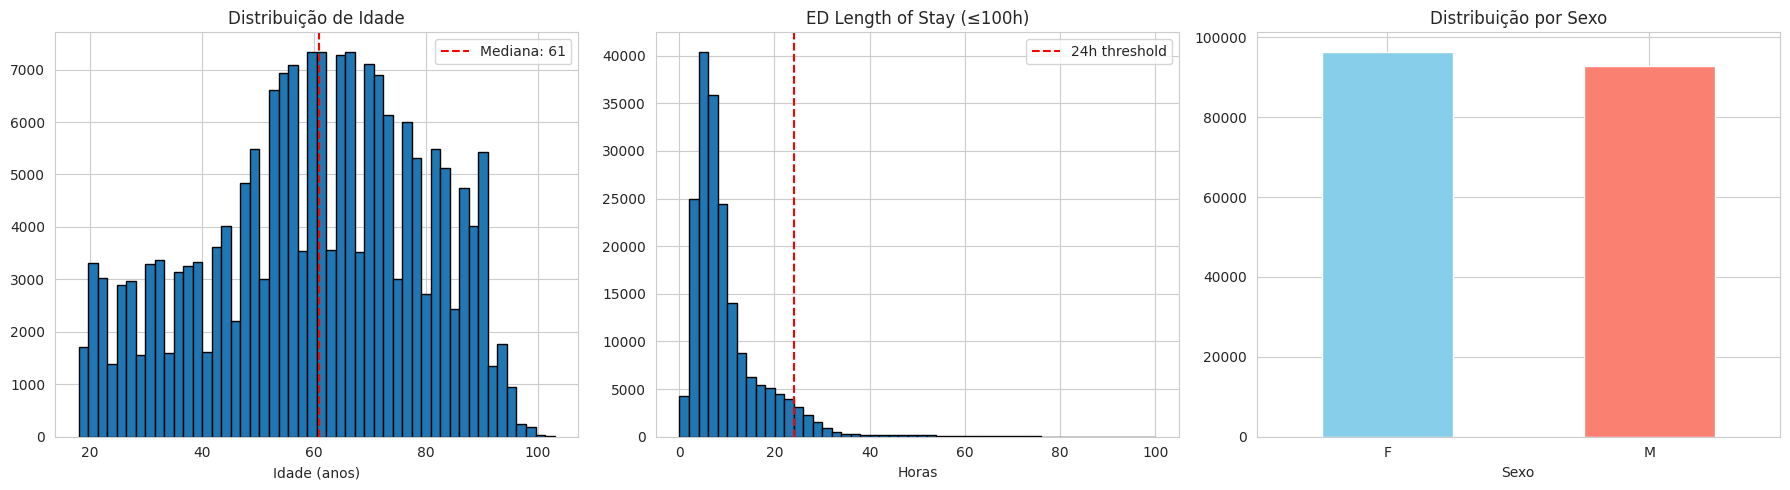

In [4]:
# ============================================================
# PARTE 2: PREPROCESSAMENTO
# ============================================================

print("\n" + "="*70)
print("🔧 PARTE 2: PREPROCESSAMENTO")
print("="*70)

preprocessor = EDPreprocessor(data)
df_filtered = preprocessor.apply_filters()

# Resumo
print("\n📊 Resumo do preprocessamento:")
summary = preprocessor.get_filter_summary()
print(summary)

# Visualizações básicas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribuição de idade
if 'age_at_ed' in df_filtered.columns:
    df_filtered['age_at_ed'].hist(bins=50, ax=axes[0], edgecolor='black')
    axes[0].set_title('Distribuição de Idade')
    axes[0].set_xlabel('Idade (anos)')
    axes[0].axvline(df_filtered['age_at_ed'].median(), color='red', 
                   linestyle='--', label=f"Mediana: {df_filtered['age_at_ed'].median():.0f}")
    axes[0].legend()

# Distribuição de ED LOS
if 'ed_los_hours' in df_filtered.columns:
    df_filtered[df_filtered['ed_los_hours'] <= 100]['ed_los_hours'].hist(
        bins=50, ax=axes[1], edgecolor='black'
    )
    axes[1].set_title('ED Length of Stay (≤100h)')
    axes[1].set_xlabel('Horas')
    axes[1].axvline(24, color='red', linestyle='--', label='24h threshold')
    axes[1].legend()

# Distribuição por sexo
if 'gender' in df_filtered.columns:
    gender_counts = df_filtered['gender'].value_counts()
    gender_counts.plot(kind='bar', ax=axes[2], color=['skyblue', 'salmon'])
    axes[2].set_title('Distribuição por Sexo')
    axes[2].set_xlabel('Sexo')
    axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [10]:
# ====== CÉLULA DE DIAGNÓSTICO (adicionar antes dos gráficos) ======

print("\n" + "="*70)
print("🔍 DIAGNÓSTICO DE FEATURES")
print("="*70)

# 1. Verificar se df_engineered tem features de triage
print("\n1️⃣  Features de Triagem:")
triage_cols = [c for c in df_engineered.columns if c.startswith('triage_')]
print(f"   Total: {len(triage_cols)}")

if triage_cols:
    print(f"   Colunas: {', '.join(triage_cols[:5])}...")
    
    # Verificar dados em cada feature
    print("\n   📊 Estatísticas:")
    for col in triage_cols[:6]:  # Primeiras 6
        if df_engineered[col].dtype in ['float64', 'int64']:
            n_valid = df_engineered[col].notna().sum()
            pct = n_valid / len(df_engineered) * 100
            mean_val = df_engineered[col].mean()
            print(f"      {col:30s}: {n_valid:6,} ({pct:5.1f}%) | Média: {mean_val:7.2f}")
else:
    print("   ❌ NENHUMA feature de triage encontrada!")
    print("   Problema: extract_triage_features() não funcionou corretamente")

# 2. Verificar features de laboratório
print("\n2️⃣  Features de Laboratório:")
lab_value_cols = [c for c in df_engineered.columns if c.startswith('lab_') and c.endswith('_value')]
print(f"   Total: {len(lab_value_cols)}")

if lab_value_cols:
    # Verificar quantos pacientes têm cada lab
    print("\n   📊 Utilização (top 5):")
    for col in lab_value_cols[:5]:
        n_valid = df_engineered[col].notna().sum()
        pct = n_valid / len(df_engineered) * 100
        print(f"      {col:30s}: {n_valid:6,} ({pct:5.1f}%)")

# 3. Verificar estrutura geral
print("\n3️⃣  Estrutura Geral:")
print(f"   Total de colunas: {len(df_engineered.columns)}")
print(f"   Total de registros: {len(df_engineered):,}")
print(f"   Memória: {df_engineered.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# 4. Verificar se dados foram perdidos
print("\n4️⃣  Comparação com DataFrame Original:")
print(f"   Registros originais (df_filtered): {len(df_filtered):,}")
print(f"   Registros finais (df_engineered): {len(df_engineered):,}")
print(f"   Diferença: {len(df_filtered) - len(df_engineered):,}")

if len(df_filtered) != len(df_engineered):
    print("   ⚠️  ATENÇÃO: Registros foram perdidos no processo!")

# 5. Mostrar sample de dados
print("\n5️⃣  Sample de Dados (primeiras 3 linhas, features de triage):")
if triage_cols:
    sample_cols = ['stay_id'] + triage_cols[:6]
    sample_cols = [c for c in sample_cols if c in df_engineered.columns]
    print(df_engineered[sample_cols].head(3))
else:
    print("   ❌ Nenhuma feature disponível para mostrar")

print("\n" + "="*70)


🔍 DIAGNÓSTICO DE FEATURES

1️⃣  Features de Triagem:
   Total: 13
   Colunas: triage_completeness, triage_age, triage_gender_male, triage_gender_female, triage_heart_rate...

   📊 Estatísticas:
      triage_completeness           : 189,158 (100.0%) | Média:    6.95
      triage_gender_male            : 189,158 (100.0%) | Média:    0.49
      triage_gender_female          : 189,158 (100.0%) | Média:    0.51

2️⃣  Features de Laboratório:
   Total: 11

   📊 Utilização (top 5):
      lab_BLOOD_GAS_value           : 61,733 ( 32.6%)
      lab_CARDIO_value              :  4,281 (  2.3%)
      lab_CBC_value                 : 59,296 ( 31.3%)
      lab_CHEM_value                : 60,481 ( 32.0%)
      lab_COAG_value                : 36,198 ( 19.1%)

3️⃣  Estrutura Geral:
   Total de colunas: 89
   Total de registros: 189,158
   Memória: 120.5 MB

4️⃣  Comparação com DataFrame Original:
   Registros originais (df_filtered): 189,158
   Registros finais (df_engineered): 189,158
   Diferença: 0

5

INFO:src.data.feature_engineering:✓ Configuração de labs carregada
INFO:src.data.feature_engineering:✓ DataFrame validado: 189,158 registros
INFO:src.data.feature_engineering:
INFO:src.data.feature_engineering:🏥 EXTRAÇÃO DE TRIAGE FEATURES
INFO:src.data.feature_engineering:============================================================
INFO:src.data.feature_engineering:  ✓ Age: média 60.0 anos
INFO:src.data.feature_engineering:  ✓ Gender: 49.0% masculino
INFO:src.data.feature_engineering:  ✓ triage_heart_rate: 99.9% válidos
INFO:src.data.feature_engineering:  ✓ triage_respiratory_rate: 98.9% válidos
INFO:src.data.feature_engineering:  ✓ triage_sbp: 99.7% válidos
INFO:src.data.feature_engineering:  ✓ triage_dbp: 99.5% válidos
INFO:src.data.feature_engineering:  ✓ triage_temperature: 98.1% válidos
INFO:src.data.feature_engineering:  ✓ triage_spo2: 99.0% válidos
INFO:src.data.feature_engineering:  ✓ ESI Acuity: média 2.37



🔬 PARTE 3: FEATURE ENGINEERING

--- Triage Features ---


INFO:src.data.feature_engineering:  ✓ Chief Complaint: 189156 com texto
INFO:src.data.feature_engineering:
✅ Total de features de triagem: 13
INFO:src.data.feature_engineering:
📊 Completude das features:
INFO:src.data.feature_engineering:  triage_completeness           : 100.0%
INFO:src.data.feature_engineering:  triage_gender_male            : 100.0%
INFO:src.data.feature_engineering:  triage_gender_female          : 100.0%
INFO:src.data.feature_engineering:  triage_acuity                 : 100.0%
INFO:src.data.feature_engineering:  triage_heart_rate             :  99.9%
INFO:src.data.feature_engineering:  triage_sbp                    :  99.7%
INFO:src.data.feature_engineering:  triage_dbp                    :  99.5%
INFO:src.data.feature_engineering:  triage_spo2                   :  99.0%
INFO:src.data.feature_engineering:  triage_respiratory_rate       :  98.9%
INFO:src.data.feature_engineering:  triage_temperature            :  98.1%
INFO:src.data.feature_engineering:  triage_pai


--- Laboratory Features ---


INFO:src.data.feature_engineering:  → 1,838,673 labs na janela de 12h
INFO:src.data.feature_engineering:  → 76,454 ED stays com labs
INFO:src.data.feature_engineering:  → 1,838,673 labs dos 68 testes relevantes
INFO:src.data.feature_engineering:
  📊 Distribuição por grupo:
INFO:src.data.feature_engineering:    CBC            : 759,125 ( 41.3%)
INFO:src.data.feature_engineering:    CHEM           : 398,522 ( 21.7%)
INFO:src.data.feature_engineering:    BLOOD_GAS      : 277,123 ( 15.1%)
INFO:src.data.feature_engineering:    COAG           : 117,837 (  6.4%)
INFO:src.data.feature_engineering:    LFTS           : 108,251 (  5.9%)
INFO:src.data.feature_engineering:
  🔄 Agregando labs por grupo...
INFO:src.data.feature_engineering:  ✓ 76,454 stays com labs agregados
INFO:src.data.feature_engineering:
  ℹ️  Features preservadas após merge:
INFO:src.data.feature_engineering:     Colunas antes: 50
INFO:src.data.feature_engineering:     Colunas depois: 72
INFO:src.data.feature_engineering:     C


--- Time-Costs ---


INFO:src.data.feature_engineering:
📊 Time-costs médios (minutos):
INFO:src.data.feature_engineering:  Sequential: 102.9
INFO:src.data.feature_engineering:  Parallel: 38.6
INFO:src.data.feature_engineering:  Mixed: 57.9
INFO:src.data.feature_engineering:
  ⏱️  Labs representam 18.9% do ED LOS em média



📊 Resumo de Features:

Total de features: 89
  - Triage features: 13
  - Lab features: 38


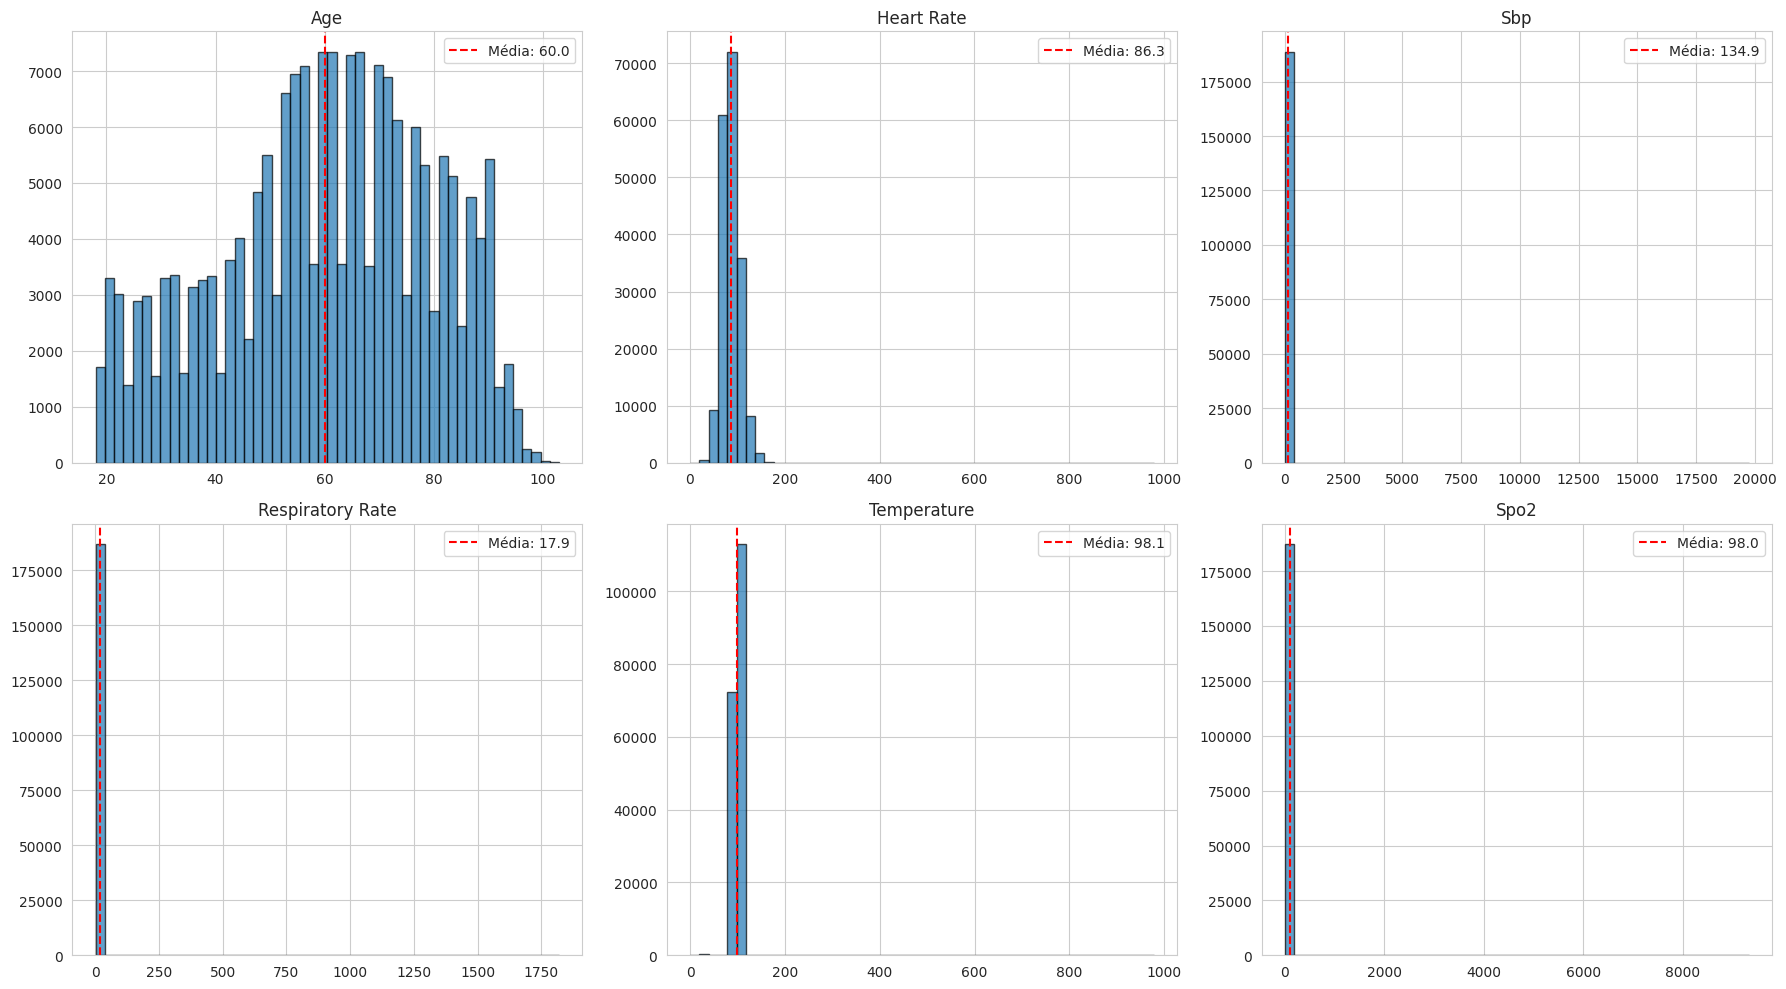

In [9]:
# ============================================================
# PARTE 3: FEATURE ENGINEERING
# ============================================================

print("\n" + "="*70)
print("🔬 PARTE 3: FEATURE ENGINEERING")
print("="*70)

# Inicializar
lab_data = data.get('labevents', pd.DataFrame())
lab_items = data.get('d_labitems', pd.DataFrame())

engineer = FeatureEngineer(
    df=df_filtered,
    lab_data=lab_data,
    lab_items=lab_items
)

# 3.1 Extrair Triage Features
print("\n--- Triage Features ---")
df_with_triage = engineer.extract_triage_features()

# 3.2 Extrair Lab Features (se disponível)
if not lab_data.empty:
    print("\n--- Laboratory Features ---")
    df_with_labs = engineer.extract_lab_features(
        time_window_hours=12,
        use_first_value=True
    )
    
    # Calcular time-costs
    print("\n--- Time-Costs ---")
    df_engineered = engineer.calculate_lab_time_costs(df_with_labs)
else:
    print("\n⚠️  Lab data não disponível, usando apenas triage features")
    df_engineered = df_with_triage

# Resumo de features
print("\n📊 Resumo de Features:")
feature_summary = engineer.get_feature_summary(df_engineered)
print(f"\nTotal de features: {len(df_engineered.columns)}")
print(f"  - Triage features: {len([c for c in df_engineered.columns if c.startswith('triage_')])}")
print(f"  - Lab features: {len([c for c in df_engineered.columns if c.startswith('lab_')])}")

# Visualizar features vitais
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

vital_features = [
    'triage_age', 'triage_heart_rate', 'triage_sbp', 
    'triage_respiratory_rate', 'triage_temperature', 'triage_spo2'
]

for idx, feature in enumerate(vital_features):
    if feature in df_engineered.columns:
        data_clean = df_engineered[feature].dropna()
        if len(data_clean) > 0:
            data_clean.hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
            axes[idx].set_title(feature.replace('triage_', '').replace('_', ' ').title())
            axes[idx].axvline(data_clean.mean(), color='red', linestyle='--', 
                             label=f'Média: {data_clean.mean():.1f}')
            axes[idx].legend()

plt.tight_layout()
plt.show()


🏷️  PARTE 4: CRIAÇÃO DE LABELS


INFO:src.data.labeling:✓ OutcomeLabeler inicializado: 189,158 registros
INFO:src.data.labeling:
INFO:src.data.labeling:🏷️  CRIAÇÃO DE OUTCOME LABELS
INFO:src.data.labeling:============================================================
INFO:src.data.labeling:
1️⃣  Criando label: Critical Outcome
INFO:src.data.labeling:    → 1,472 mortes via hospital_expire_flag
INFO:src.data.labeling:    → 9,392 transferências ICU em 12h
INFO:src.data.labeling:  ✓ Morte hospitalar: 1,472 (0.78%)
INFO:src.data.labeling:  ✓ ICU em 12h: 9,392 (4.97%)
INFO:src.data.labeling:  ✓ Critical Outcome: 10,105 (5.34%)
INFO:src.data.labeling:
2️⃣  Criando label: Lengthened ED Stay
INFO:src.data.labeling:  ✓ Lengthened Stay: 11,227 (5.94%)
INFO:src.data.labeling:
  📊 Estatísticas de ED LOS:
INFO:src.data.labeling:    Média: 9.87h
INFO:src.data.labeling:    Mediana: 7.37h
INFO:src.data.labeling:    P75: 11.67h
INFO:src.data.labeling:    P95: 25.05h
INFO:src.data.labeling:
INFO:src.data.labeling:📊 ESTATÍSTICAS DOS LABELS


📊 Resumo dos Labels:
             Label  N Positivos  % Positivos  N Negativos  % Negativos  Paper %
  Critical Outcome        10105     5.342095       179053    94.657905     9.67
Lengthened ED Stay        11227     5.935250       177931    94.064750     6.90


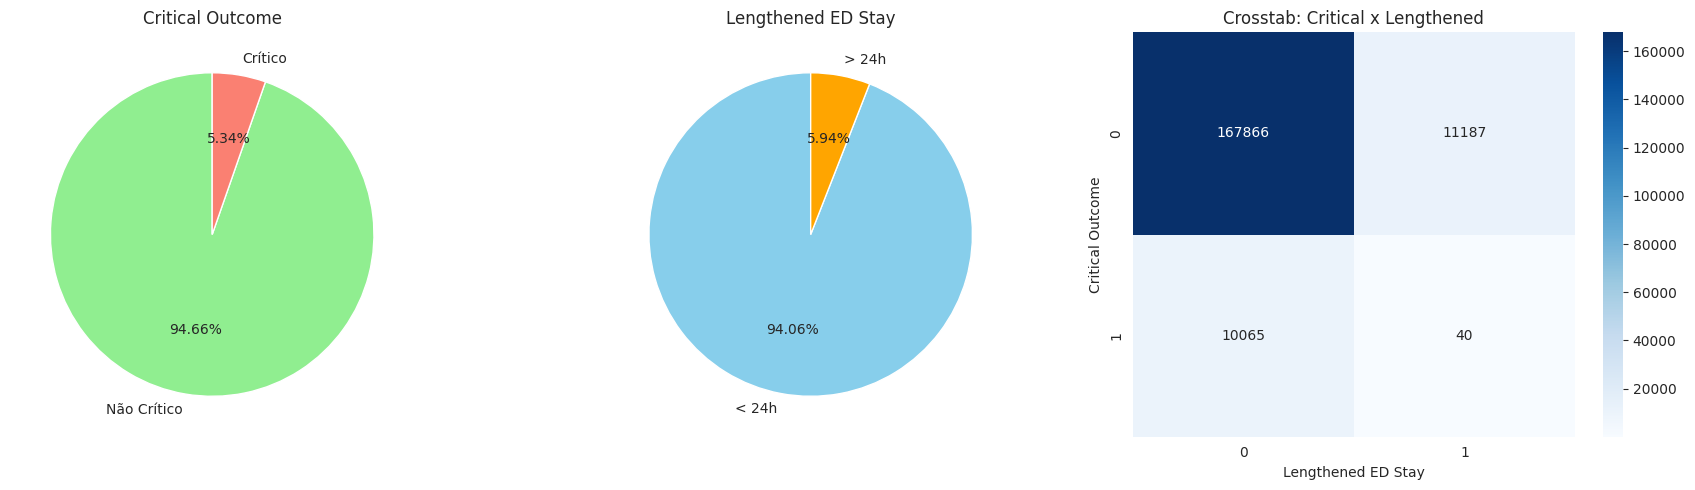

In [11]:
# ============================================================
# PARTE 4: LABELING
# ============================================================

print("\n" + "="*70)
print("🏷️  PARTE 4: CRIAÇÃO DE LABELS")
print("="*70)

# Inicializar labeler com dados adicionais
labeler = OutcomeLabeler(
    df=df_engineered,
    data_dict={
        'admissions': data.get('admissions', pd.DataFrame()),
        'icustays': data.get('icustays', pd.DataFrame())
    }
)

# Criar labels
df_labeled = labeler.create_all_labels()

# Análise de correlações
correlations = labeler.analyze_label_correlations(df_labeled)

# Resumo dos labels
print("\n📊 Resumo dos Labels:")
label_summary = labeler.get_label_summary(df_labeled)
print(label_summary.to_string(index=False))

# Visualizações dos labels
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Critical Outcome
if 'critical_outcome' in df_labeled.columns:
    critical_counts = df_labeled['critical_outcome'].value_counts()
    axes[0].pie(critical_counts, labels=['Não Crítico', 'Crítico'], 
               autopct='%1.2f%%', startangle=90, 
               colors=['lightgreen', 'salmon'])
    axes[0].set_title('Critical Outcome')

# Lengthened ED Stay
if 'lengthened_ed_stay' in df_labeled.columns:
    lengthened_counts = df_labeled['lengthened_ed_stay'].value_counts()
    axes[1].pie(lengthened_counts, labels=['< 24h', '> 24h'], 
               autopct='%1.2f%%', startangle=90, 
               colors=['skyblue', 'orange'])
    axes[1].set_title('Lengthened ED Stay')

# Crosstab
if 'critical_outcome' in df_labeled.columns and 'lengthened_ed_stay' in df_labeled.columns:
    crosstab = pd.crosstab(
        df_labeled['critical_outcome'],
        df_labeled['lengthened_ed_stay']
    )
    
    sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title('Crosstab: Critical x Lengthened')
    axes[2].set_xlabel('Lengthened ED Stay')
    axes[2].set_ylabel('Critical Outcome')

plt.tight_layout()
plt.show()


📊 PARTE 5: ANÁLISES E VALIDAÇÃO

--- Estatísticas por Critical Outcome ---

Não Crítico (n=179,053):
  Idade média: 59.7 anos
  ED LOS média: 10.1 horas
  Labs médios: 1.8 grupos

Crítico (n=10,105):
  Idade média: 65.6 anos
  ED LOS média: 5.9 horas
  Labs médios: 4.3 grupos

--- Top Correlações com Critical Outcome ---


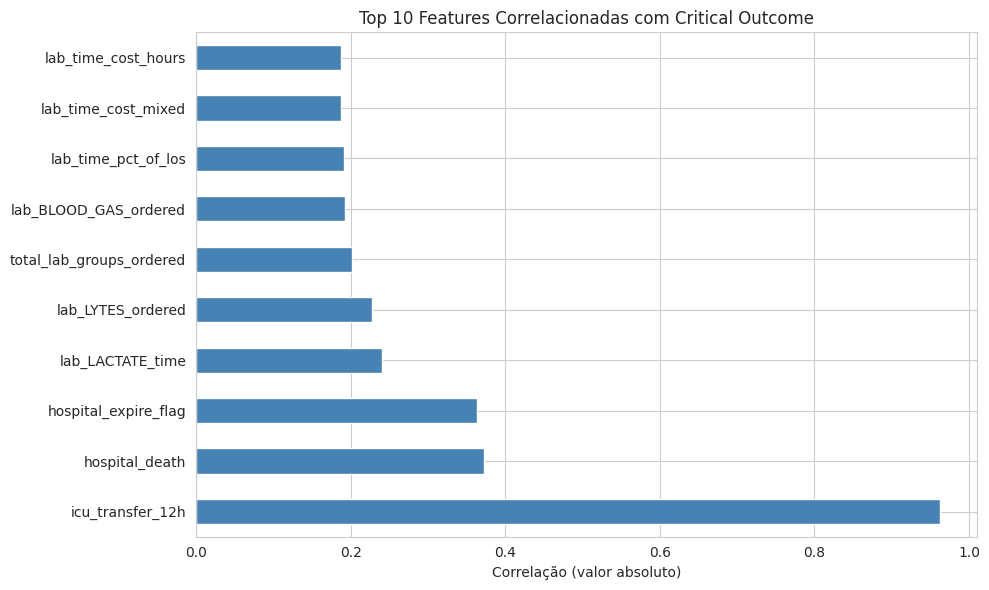

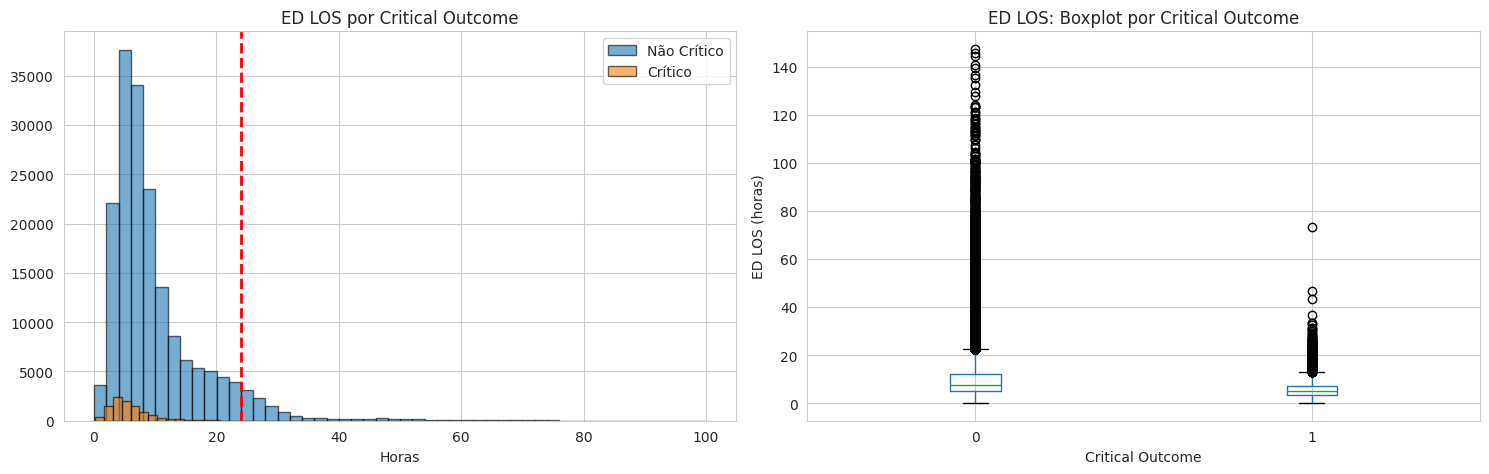

In [12]:

# ============================================================
# PARTE 5: ANÁLISES FINAIS
# ============================================================

print("\n" + "="*70)
print("📊 PARTE 5: ANÁLISES E VALIDAÇÃO")
print("="*70)

# 5.1 Estatísticas descritivas por outcome
if 'critical_outcome' in df_labeled.columns:
    print("\n--- Estatísticas por Critical Outcome ---")
    
    for outcome_val in [0, 1]:
        subset = df_labeled[df_labeled['critical_outcome'] == outcome_val]
        label = "Não Crítico" if outcome_val == 0 else "Crítico"
        
        print(f"\n{label} (n={len(subset):,}):")
        
        if 'triage_age' in subset.columns:
            print(f"  Idade média: {subset['triage_age'].mean():.1f} anos")
        
        if 'ed_los_hours' in subset.columns:
            print(f"  ED LOS média: {subset['ed_los_hours'].mean():.1f} horas")
        
        if 'total_lab_groups_ordered' in subset.columns:
            print(f"  Labs médios: {subset['total_lab_groups_ordered'].mean():.1f} grupos")

# 5.2 Correlações com outcomes
if 'critical_outcome' in df_labeled.columns:
    print("\n--- Top Correlações com Critical Outcome ---")
    
    numeric_cols = df_labeled.select_dtypes(include=[np.number]).columns
    numeric_cols = [c for c in numeric_cols if not c.endswith('_id')]
    
    if len(numeric_cols) > 0:
        corr_matrix = df_labeled[numeric_cols].corr()
        
        if 'critical_outcome' in corr_matrix.columns:
            top_corr = corr_matrix['critical_outcome'].abs().sort_values(ascending=False).head(11)[1:]
            
            # Plot
            fig, ax = plt.subplots(figsize=(10, 6))
            top_corr.plot(kind='barh', ax=ax, color='steelblue')
            ax.set_title('Top 10 Features Correlacionadas com Critical Outcome')
            ax.set_xlabel('Correlação (valor absoluto)')
            plt.tight_layout()
            plt.show()

# 5.3 Distribuição de ED LOS por outcome
if 'ed_los_hours' in df_labeled.columns and 'critical_outcome' in df_labeled.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Por Critical Outcome
    for outcome in [0, 1]:
        subset = df_labeled[df_labeled['critical_outcome'] == outcome]
        label = "Não Crítico" if outcome == 0 else "Crítico"
        
        subset[subset['ed_los_hours'] <= 100]['ed_los_hours'].hist(
            bins=50, ax=axes[0], alpha=0.6, label=label, edgecolor='black'
        )
    
    axes[0].set_title('ED LOS por Critical Outcome')
    axes[0].set_xlabel('Horas')
    axes[0].legend()
    axes[0].axvline(24, color='red', linestyle='--', linewidth=2)
    
    # Boxplot
    df_labeled.boxplot(column='ed_los_hours', by='critical_outcome', ax=axes[1])
    axes[1].set_title('ED LOS: Boxplot por Critical Outcome')
    axes[1].set_xlabel('Critical Outcome')
    axes[1].set_ylabel('ED LOS (horas)')
    plt.suptitle('')  # Remove título automático
    
    plt.tight_layout()
    plt.show()


In [14]:
# ============================================================
# PARTE 6: SALVAR RESULTADOS
# ============================================================

print("\n" + "="*70)
print("💾 PARTE 6: SALVANDO RESULTADOS")
print("="*70)

# Salvar dados finais
output_path = '../data/processed/labeled_data.parquet'
labeler.save_labels(df_labeled, output_path)

# Salvar resumos
summaries_dir = Path('../data/processed/summaries')
summaries_dir.mkdir(parents=True, exist_ok=True)

# Resumo de features
feature_summary.to_csv(summaries_dir / 'feature_summary.csv', index=False)
print(f"✓ Feature summary salvo")

# Resumo de labels
label_summary.to_csv(summaries_dir / 'label_summary.csv', index=False)
print(f"✓ Label summary salvo")

# Estatísticas descritivas
desc_stats = df_labeled.describe(include='all').T
desc_stats.to_csv(summaries_dir / 'descriptive_stats.csv')
print(f"✓ Estatísticas descritivas salvas")



💾 PARTE 6: SALVANDO RESULTADOS


INFO:src.data.labeling:
💾 Dados com labels salvos em: ../data/processed/labeled_data.parquet
INFO:src.data.labeling:   Tamanho: 21.7 MB
INFO:src.data.labeling:   Registros: 189,158


✓ Feature summary salvo
✓ Label summary salvo
✓ Estatísticas descritivas salvas


In [15]:
# ============================================================
# RESUMO FINAL
# ============================================================

print("\n" + "="*70)
print("✅ PIPELINE COMPLETO - RESUMO FINAL")
print("="*70)

print(f"\n📊 Dataset Final:")
print(f"  Registros: {len(df_labeled):,}")
print(f"  Features: {len(df_labeled.columns)}")
print(f"  Memória: {df_labeled.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n🏷️  Labels:")
if 'critical_outcome' in df_labeled.columns:
    n_critical = df_labeled['critical_outcome'].sum()
    print(f"  Critical Outcome: {n_critical:,} ({n_critical/len(df_labeled)*100:.2f}%)")

if 'lengthened_ed_stay' in df_labeled.columns:
    n_lengthened = df_labeled['lengthened_ed_stay'].sum()
    print(f"  Lengthened ED Stay: {n_lengthened:,} ({n_lengthened/len(df_labeled)*100:.2f}%)")

print(f"\n📁 Arquivos Salvos:")
print(f"  - {output_path}")
print(f"  - {summaries_dir}/feature_summary.csv")
print(f"  - {summaries_dir}/label_summary.csv")
print(f"  - {summaries_dir}/descriptive_stats.csv")

print("\n🎉 Pipeline executado com sucesso!")
print("="*70)


✅ PIPELINE COMPLETO - RESUMO FINAL

📊 Dataset Final:
  Registros: 189,158
  Features: 93
  Memória: 126.2 MB

🏷️  Labels:
  Critical Outcome: 10,105 (5.34%)
  Lengthened ED Stay: 11,227 (5.94%)

📁 Arquivos Salvos:
  - ../data/processed/labeled_data.parquet
  - ../data/processed/summaries/feature_summary.csv
  - ../data/processed/summaries/label_summary.csv
  - ../data/processed/summaries/descriptive_stats.csv

🎉 Pipeline executado com sucesso!
